In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import statistics as sts
import lmfit
from lmfit import Model
from scipy.stats import sem
from matplotlib import markers
import seaborn as sns


<Figure size 432x288 with 0 Axes>

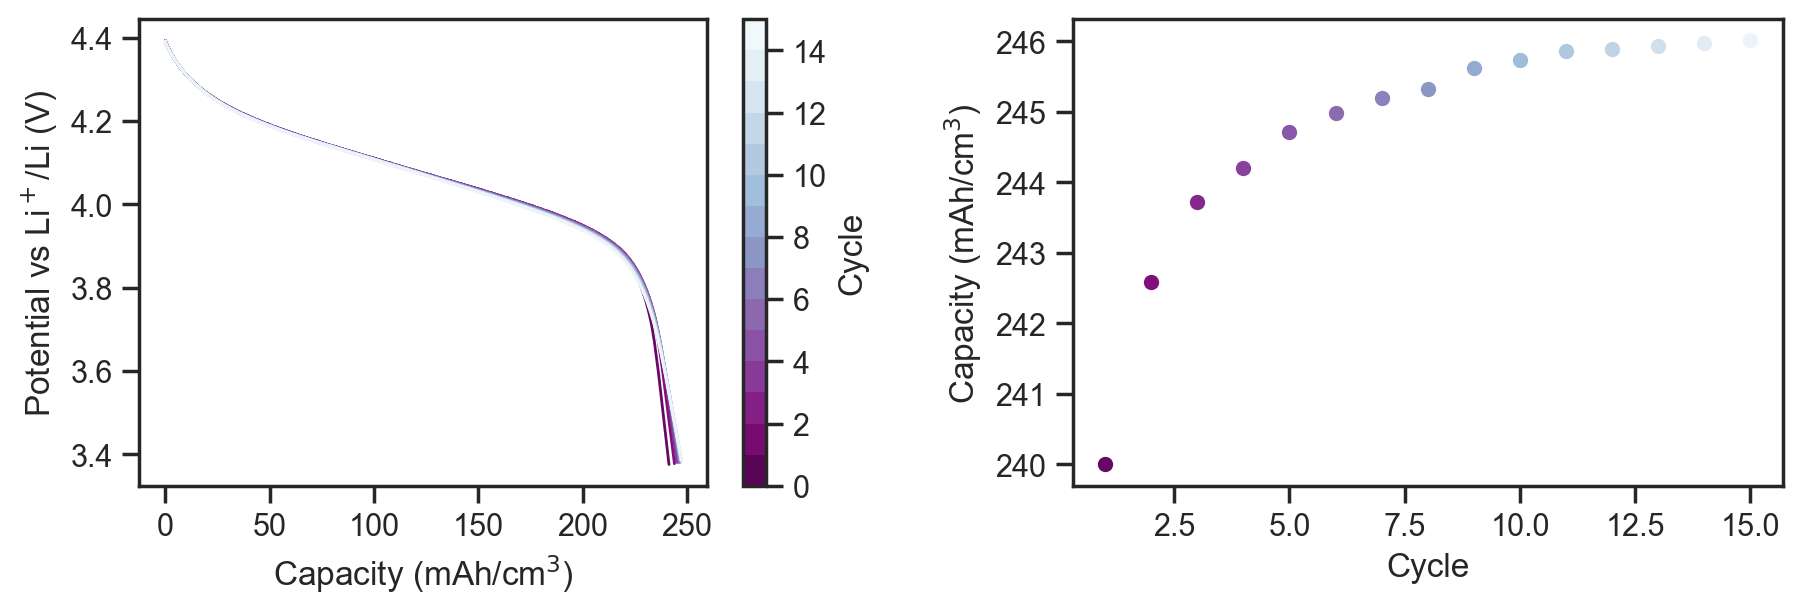

In [20]:
# Files
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_03\lith'
files = [os.path.join(path, i) for i in os.listdir(path)]

# Settings
sns.set_theme(style="ticks")
palette = 'BuPu_r'
dpi = 200
columns = ['Time (s)', 'Potential vs Li$^+$/Li (V)',  'Current (A)', 'Charge (C)']
sns.set_palette(palette, n_colors = len(files))

# Color bar
Z = [[0,0],[0,0]]
cbar = plt.contourf(Z, levels = np.arange(0, len(files) + 1, 1), cmap=palette)
plt.clf()

# Plot
fig, ax = plt.subplots(facecolor = 'white', dpi = dpi, ncols = 2, figsize = (10, 4))
fig.tight_layout(pad = 4)

# Data
data = pd.DataFrame(columns=['Cycle', 'Capacity (mAh/cm$^3$)' ])
thickness = 50 #nm

n = 1
for i in files:
    df = pd.read_csv(i, sep = ';', usecols = [1, 2, 3, 4], names = columns, skiprows = 1)
    df['Capacity (mAh/cm$^3$)'] = -1 * df['Charge (C)'] /3.6 / (0.63 * 1e-7 * thickness)    
    df['Cycle'] = n
    capcity = df['Capacity (mAh/cm$^3$)'][-10:-9] ############ edit this
    sns.lineplot(data = df, x = 'Capacity (mAh/cm$^3$)', y = columns[1], lw =1, ax = ax[0])
    sns.scatterplot(data = df, x = 'Cycle', y = capcity )
    n += 1
plt.colorbar(cbar, ax = ax[0]).set_label('Cycle')

